<a href="https://colab.research.google.com/github/MainakRepositor/Deep-Learning-Python/blob/master/Breast_Cancer_Data_Analysis_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification using ANN

<hr>

## Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
print("All necessary packages are included successfully!")

All necessary packages are included successfully!


## Importing datasets

In [13]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Breast%20Cancer%20Dataset.csv'
df = pd.read_csv(url,error_bad_lines=False)
del df['Unnamed: 32']
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Visualizing sample counts

Malignant : 212
Benign : 357


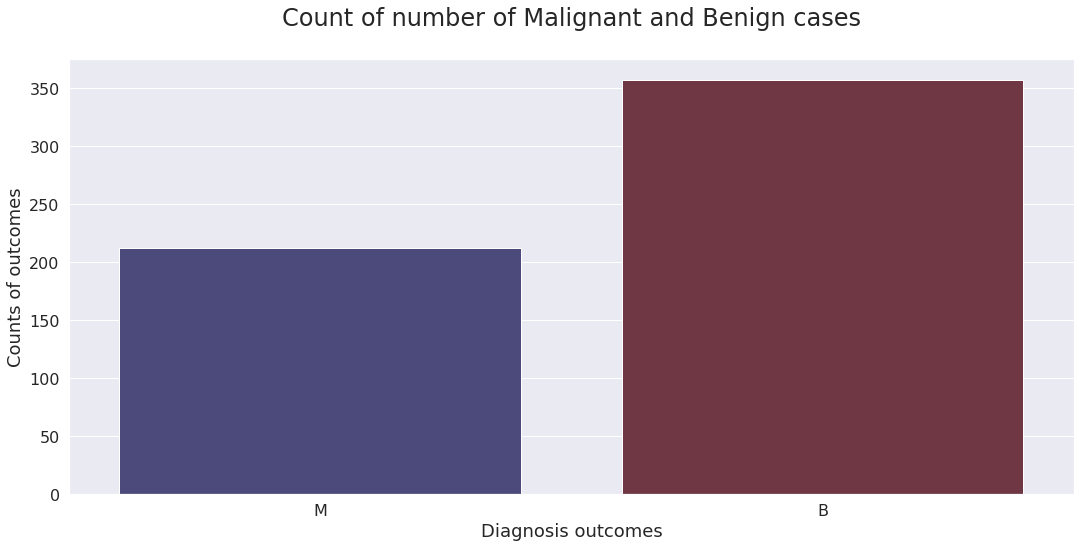

In [52]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['diagnosis'],label='count',palette='icefire')
plt.xlabel('Diagnosis outcomes',size=18)
plt.ylabel('Counts of outcomes',size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title("Count of number of Malignant and Benign cases\n",size=24)
B,M = df['diagnosis'].value_counts()
print("Malignant :",M)
print("Benign :",B)

## Label Encoding (To encode categorical data)

In [14]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the datasets

In [15]:
#Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)


## Feature Scaling

In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


## Printing the training and testing data

In [17]:
print("X_train : \n",X_train)

X_train : 
 [[-0.52787029  2.49821982 -0.59939466 ... -1.74713139 -0.79044533
  -0.91054389]
 [-0.55333608  0.29431013 -0.60759343 ... -0.62275667 -0.33646358
  -0.83551633]
 [ 2.15452653  0.40392257  2.26525805 ...  1.03846122 -0.11504791
   0.26488788]
 ...
 [-1.3297598  -0.21876938 -1.32088704 ... -0.98271999 -0.718764
  -0.13637062]
 [-1.24940108 -0.24209117 -1.2835826  ... -1.74713139 -1.58690456
  -1.01280367]
 [-0.74291476  1.08958336 -0.71827692 ... -0.2865488  -1.26354211
   0.19486216]]


In [18]:
print("X_test : \n",X_test)

X_test : 
 [[-0.19207516  0.21655218 -0.11542614 ...  1.60315155  1.38812047
   1.39561107]
 [-0.24797128  1.29875111 -0.31114085 ... -0.76400211 -0.79834577
  -0.93437281]
 [-0.00967731 -0.89539007 -0.07447263 ... -0.40317641 -1.38855752
  -0.97661799]
 ...
 [-0.46861385  0.07241152 -0.46935075 ... -0.49962508 -0.33652424
  -0.40576652]
 [-0.75986205 -0.81073603 -0.78878818 ... -0.67538685 -0.01842311
   0.13529668]
 [-0.80399056  1.71744542 -0.84310547 ... -1.40405566 -0.02225565
  -0.77243298]]


## Importing Keras frameworks and utilities for ANN

In [19]:
!pip install keras

## Importing necessary keras libraries

In [21]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

## Building the Perceptron layers in a MLP

In [25]:
classifier = Sequential()
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

## Optimising classifier and setting accuracy counter

In [26]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## Executing the ANN

In [28]:
classifier.fit(X_train,y_train,batch_size=100,epochs=150)

Epoch 1/150
6/6 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.8555
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9590
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9629
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9688
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9727
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9785
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9805
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9805
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9785
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9824
Epoch 11/150
6/6 [===========

## Classifying results

In [29]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

## Building the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

## Plotting the results of Confusion Matrix

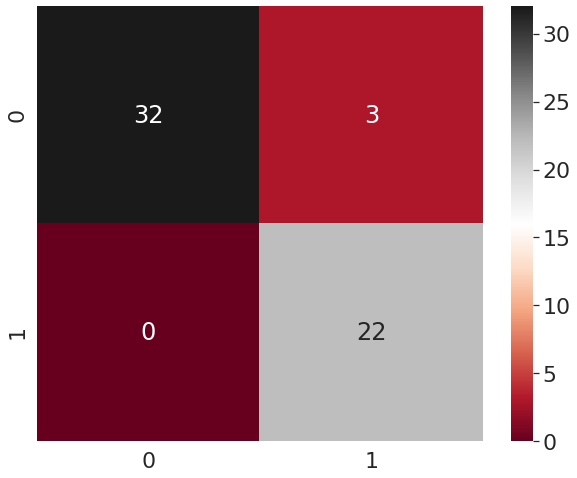

In [44]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(cm,annot=True,cmap='RdGy')
plt.savefig('Confusion Matrix')

### From the result we can see that most of the score is in True positive and False negative sections. 3 data are misclassified under the True negative section. Model accuracy is nearly 100%